In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./new_dataset.csv")
df.head()

,id,sentence,subject_entity,object_entity,relation
0,0,힙합(Hip Hop)은 1970년대 미합중국 뉴욕의 브롱스에서 유행하기 시작한 춤과...,"{'word': '1970년대', 'start_idx': 13, 'end_idx':...","{'word': '대중음악', 'start_idx': 47, 'end_idx': 5...",8
1,1,힙합(Hip Hop)은 1970년대 미합중국 뉴욕의 브롱스에서 유행하기 시작한 춤과...,"{'word': '힙합', 'start_idx': 0, 'end_idx': 1, '...","{'word': 'Hip Hop', 'start_idx': 3, 'end_idx':...",1
2,2,힙합(Hip Hop)은 1970년대 미합중국 뉴욕의 브롱스에서 유행하기 시작한 춤과...,"{'word': '미합중국 뉴욕의 브롱스', 'start_idx': 71, 'end...","{'word': '1970년대', 'start_idx': 13, 'end_idx':...",8
3,3,힙합(Hip Hop)은 1970년대 미합중국 뉴욕의 브롱스에서 유행하기 시작한 춤과...,"{'word': '아프리카계 미국인', 'start_idx': 86, 'end_id...","{'word': '대중음악', 'start_idx': 47, 'end_idx': 5...",8
4,4,힙합(Hip Hop)은 1970년대 미합중국 뉴욕의 브롱스에서 유행하기 시작한 춤과...,"{'word': '대중음악', 'start_idx': 47, 'end_idx': 5...","{'word': '아프리카계 미국인', 'start_idx': 86, 'end_id...",8


In [3]:
len(df)

3471

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='relation', ylabel='count'>

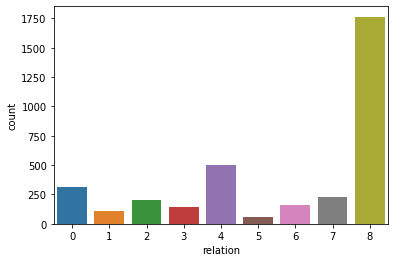

In [6]:
sns.countplot(data=df, x='relation')

In [7]:
df['relation'].value_counts()

8    1765
4     502
0     312
7     225
2     200
6     161
3     141
1     107
5      58
Name: relation, dtype: int64

In [10]:
df.iloc[0]

id                                                                0
sentence          힙합(Hip Hop)은 1970년대 미합중국 뉴욕의 브롱스에서 유행하기 시작한 춤과...
subject_entity    {'word': '1970년대', 'start_idx': 13, 'end_idx':...
object_entity     {'word': '대중음악', 'start_idx': 47, 'end_idx': 5...
relation                                                          8
Name: 0, dtype: object

In [3]:
import pickle
import pandas as pd

In [4]:
train = pd.read_csv("/opt/ml/data/train.csv")
test = pd.read_csv("/opt/ml/data/test.csv")

In [5]:
num_to_label = {
    0 : "genre:origin",
    1 : "genre:alternate_name",
    2 : "genre:super_genre",
    3 : "genre:sub_genre",
    4 : "genre:artist",
    5 : "artist:member_of",
    6 : "producer:product",
    7 : "product:origin",
    8 : "no_relation"
}

In [8]:
label_to_num = {v:k for k, v in num_to_label.items()}
label_to_num

{'genre:origin': 0,
 'genre:alternate_name': 1,
 'genre:super_genre': 2,
 'genre:sub_genre': 3,
 'genre:artist': 4,
 'artist:member_of': 5,
 'producer:product': 6,
 'product:origin': 7,
 'no_relation': 8}

In [9]:
# /opt/ml/code/dict_label_to_num.pkl
# /opt/ml/code/dict_num_to_label.pkl

with open('/opt/ml/code/dict_label_to_num.pkl', 'wb') as f:
    pickle.dump(label_to_num, f)

with open('/opt/ml/code/dict_num_to_label.pkl', 'wb') as f:
    pickle.dump(num_to_label, f)

In [10]:
train['relation'] = [num_to_label[label] for label in train['relation']]
test['relation'] = [num_to_label[label] for label in test['relation']]

In [11]:
train.head()

,id,sentence,subject_entity,object_entity,relation
0,79,90년대는 힙합이 미국 대중음악의 중심 중 하나의 축을 형성하게 된 시대라고 보아도...,"{'word': '90년대', 'start_idx': 0, 'end_idx': 3,...","{'word': '힙합', 'start_idx': 6, 'end_idx': 7, '...",no_relation
1,450,"빅 빌 브룬지와 윌리 딕슨은 유럽에 새로운 시장을 찾기 시작했고, 딕 워터맨과 그가...","{'word': '유럽', 'start_idx': 47, 'end_idx': 48,...","{'word': '딕 워터맨', 'start_idx': 37, 'end_idx': ...",no_relation
2,1912,"시부야계 관련 뮤지션에는 피치카토 파이브, 고니시 야스하루, 판타스틱 플라스틱 머신...","{'word': '시부야계', 'start_idx': 0, 'end_idx': 3,...","{'word': 'P&ART SASANOOOHA', 'start_idx': 456,...",genre:artist
3,2375,락의 시초는 블루스이며 1930년대 로버트존슨이 개발한 리듬이 시초가 된다.,"{'word': '락', 'start_idx': 0, 'end_idx': 0, 't...","{'word': '로버트존슨', 'start_idx': 20, 'end_idx': ...",genre:artist
4,869,싱어송라이터였던 행크 윌리엄스는 그의 50년대 초 전성기였고 레프티 프리첼은 그의 ...,"{'word': '50년대 초', 'start_idx': 21, 'end_idx':...","{'word': '컨트리 음악', 'start_idx': 79, 'end_idx':...",no_relation


In [12]:
test.head()

,id,sentence,subject_entity,object_entity,relation
0,2115,흑인과 백인의 음악이 혼합된 로큰롤은 이른바 “문화적 충돌”에 앞장섰던 라디오방송국...,"{'word': '로큰롤', 'start_idx': 16, 'end_idx': 18...","{'word': '흑인과 백인의 음악', 'start_idx': 0, 'end_id...",genre:origin
1,1001,홍키 통크는 로커빌리와 컨트리 팝이 주류 팬들을 휘어잡은만큼은 아니었지만 그 사운드...,"{'word': '60년대', 'start_idx': 52, 'end_idx': 5...","{'word': '컨트리 팝', 'start_idx': 58, 'end_idx': ...",no_relation
2,470,"재즈는 초기 뉴올리언스 딕시랜드, 스윙 시대의 빅 밴드 음악, 비밥, 라틴 재즈, ...","{'word': '뉴올리언스 딕시랜드', 'start_idx': 7, 'end_id...","{'word': '힙합', 'start_idx': 62, 'end_idx': 63,...",no_relation
3,9,2010년대 힙합은 기존의 모습을 가지면서도 수 많은 형태로 표현된다.,"{'word': '2010년대', 'start_idx': 0, 'end_idx': ...","{'word': '힙합', 'start_idx': 7, 'end_idx': 8, '...",no_relation
4,2385,록이라는 용어는 정의하기 모호하다. 이 단어는 때때로 여러 장르들이 모호하게 섞여있...,"{'word': '록', 'start_idx': 0, 'end_idx': 0, 't...","{'word': '힙합', 'start_idx': 70, 'end_idx': 71,...",genre:super_genre


In [13]:
train.to_csv("data/train.csv", index=False)
test.to_csv("data/test.csv", index=False)